In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [4]:
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"



In [5]:
HEART_PATH="heart"

In [6]:
import pandas as pd
#calling data
def load_heartscores_data(heartscores_path=HEART_PATH):
    csv_path = os.path.join(heartscores_path,"heart_scores.csv")
    return pd.read_csv(csv_path)

In [7]:
heart_scores = load_heartscores_data()
heart_scores.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [141]:
heart_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [142]:
heart_scores.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [143]:
heart_scores["output"].unique()

array([1, 0])

In [144]:
heart_scores.shape

(303, 14)

In [145]:
heart_scores.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [146]:
heart_scores["chol"].value_counts()

204    6
197    6
234    6
269    5
212    5
      ..
215    1
210    1
200    1
195    1
417    1
Name: chol, Length: 152, dtype: int64

In [147]:
heart_scores.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

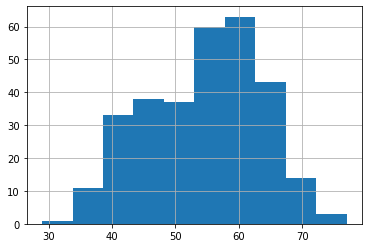

In [148]:
heart_scores["age"].hist()

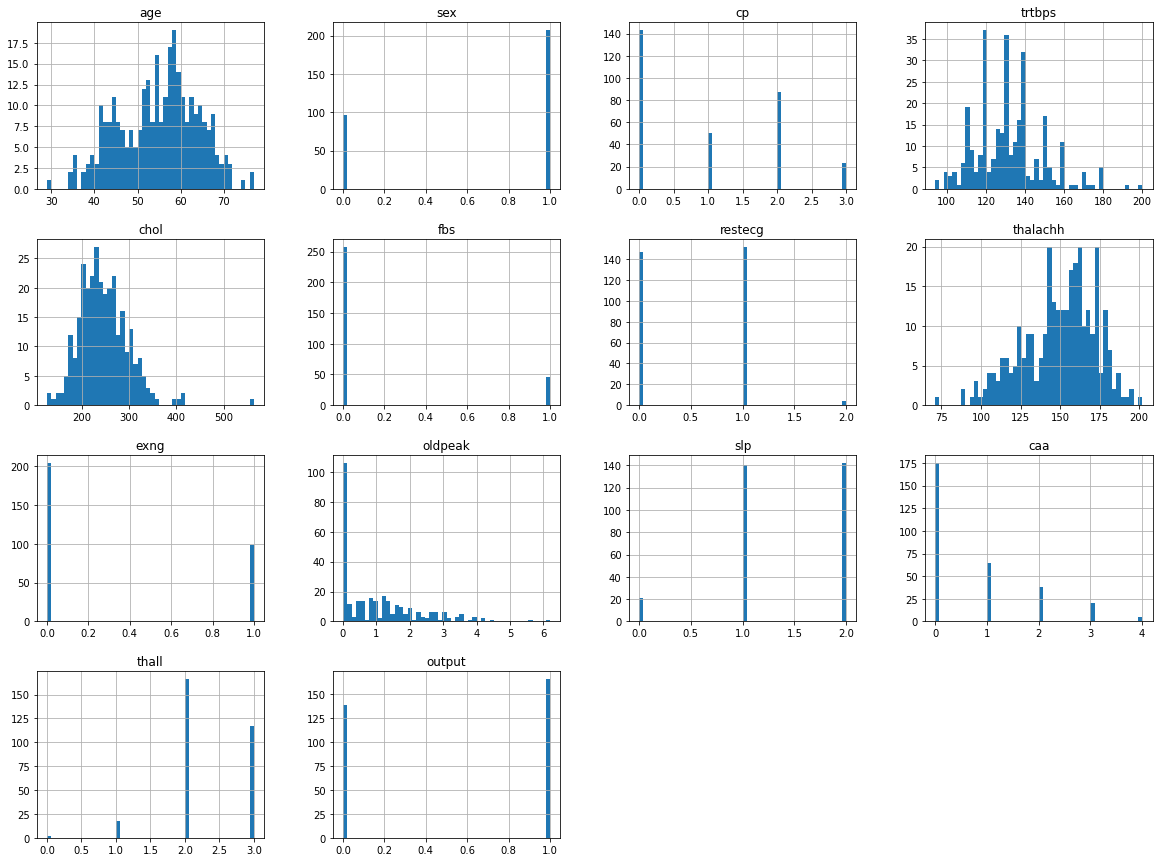

In [149]:
%matplotlib inline
import matplotlib.pyplot as plt
heart_scores.hist(bins=48, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

In [150]:
corr_matrix['output'].sort_values(ascending=False)


NameError: name 'corr_matrix' is not defined

In [151]:
corr_matrix = heart_scores.corr()

In [152]:
corr_matrix["chol"].sort_values(ascending=False)
#age has the highest correlation between cholestrol.
#higher value in cholestrols are most prone to females.

chol        1.000000
age         0.213678
trtbps      0.123174
thall       0.098803
caa         0.070511
exng        0.067023
oldpeak     0.053952
fbs         0.013294
slp        -0.004038
thalachh   -0.009940
cp         -0.076904
output     -0.085239
restecg    -0.151040
sex        -0.197912
Name: chol, dtype: float64

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='chol', ylabel='age'>,
        <AxesSubplot:xlabel='cp', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='chol'>,
        <AxesSubplot:xlabel='chol', ylabel='chol'>,
        <AxesSubplot:xlabel='cp', ylabel='chol'>],
       [<AxesSubplot:xlabel='age', ylabel='cp'>,
        <AxesSubplot:xlabel='chol', ylabel='cp'>,
        <AxesSubplot:xlabel='cp', ylabel='cp'>]], dtype=object)

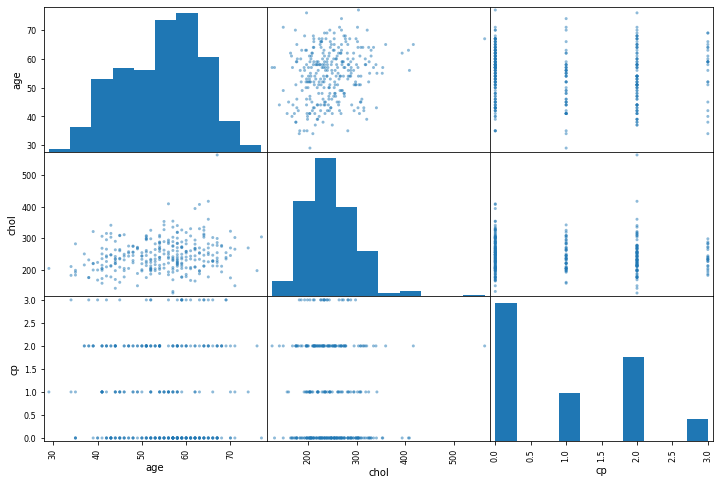

In [153]:
from pandas.plotting import scatter_matrix

attributes = ["age", "chol", "cp"]
scatter_matrix(heart_scores[attributes], figsize=(12,8))

<AxesSubplot:xlabel='age', ylabel='chol'>

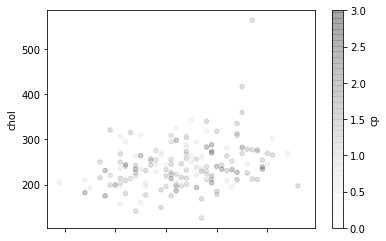

In [154]:
heart_scores.plot(kind="scatter", x="age", y="chol", c="cp",alpha=0.2)

#### heart_scores.plot(kind="scatter",x="cp",y="chol", alpha=0.4,
            label="trtbps", figsize=(10,7), c="age",
             colorbar=True,
            sharex=False)
plt.legend()

<AxesSubplot:xlabel='age', ylabel='chol'>

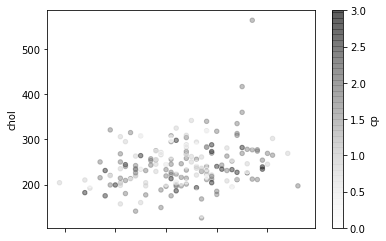

In [155]:
heart_scores.plot(kind="scatter", x="age", y="chol",c="cp", colorbar=True , alpha=0.4,)

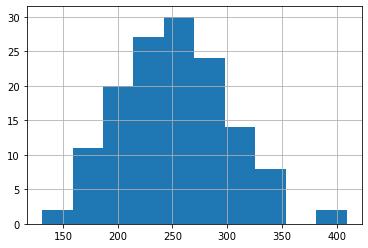

In [156]:
ha2["chol"].hist()
plt.xlabel= "Cholestrol when Output is 0"
plt.ylabel= "Count"
plt.show()

In [157]:
ha1=heart_scores[heart_scores["output"]==1]
#test subjects who had heart attacks

In [158]:
ha2=heart_scores[heart_scores["output"]==0]
#test subjects who did not have heart attacks

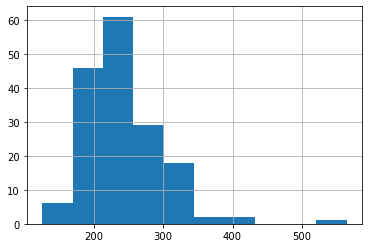

In [159]:
ha1["chol"].hist()
plt.show()

Text(0.5, 1.0, 'CHOLESTROL,CHESTPAIN,AND AGE OF PEOPLE W/ NO HEART ATTACKS')

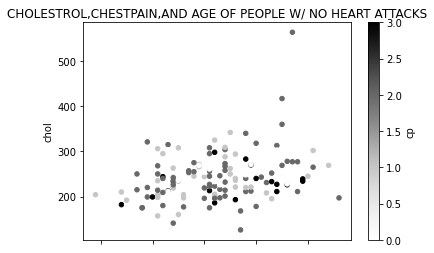

In [160]:
ha1.plot(x="age", y="chol",kind='scatter',c="cp", alpha=1, legend= True)

#plt.title ("CHOLESTROL,CHESTPAIN,AND AGE OF PEOPLE WITH HEART ATTACKS")
plt.title ("CHOLESTROL,CHESTPAIN,AND AGE OF PEOPLE W/ NO HEART ATTACKS")

#plt.show()



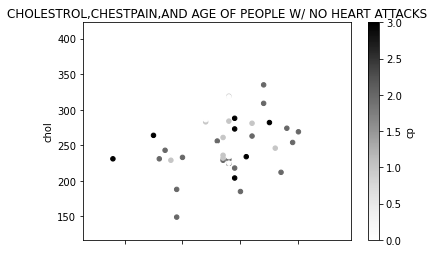

In [161]:
ha2.plot(x="age", y="chol",kind='scatter',c="cp", alpha=1, xlabel="age",legend= True)

plt.title ("CHOLESTROL,CHESTPAIN,AND AGE OF PEOPLE W/ NO HEART ATTACKS")
plt.show()

TypeError: 'str' object is not callable

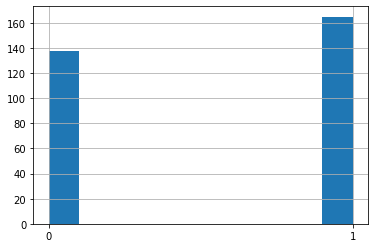

In [162]:
heart_scores["output"].hist()
plt.xticks(ticks=[0,1],labels=["0","1"])
plt.xlabel("HEART ATTACK OUTPUT")
plt.ylabel("COUNT")

plt.show()

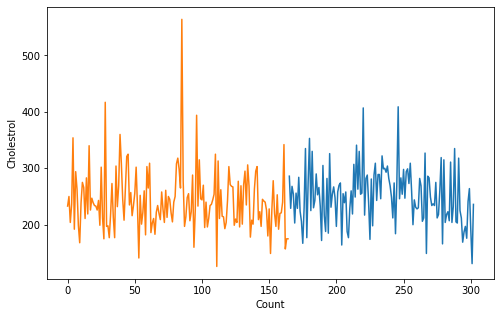

In [179]:
plt.figure(figsize=(8,5))
plt.plot(ha2["chol"], label="0" )
plt.plot(ha1["chol"], label="1")

plt.xlabel("Count")
plt.ylabel("Cholestrol")


plt.show()





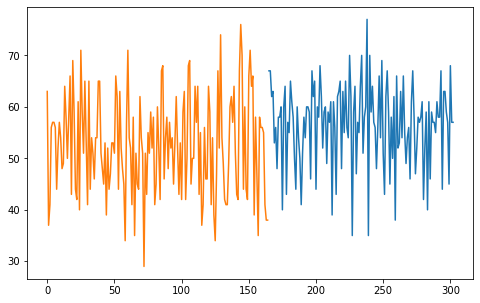

In [528]:
plt.figure(figsize=(8,5))
plt.plot(ha2["age"], label="0" )
plt.plot(ha1["age"], label="1")




plt.show()

ha1.plot(kind="kde"), label = 'output 0m'

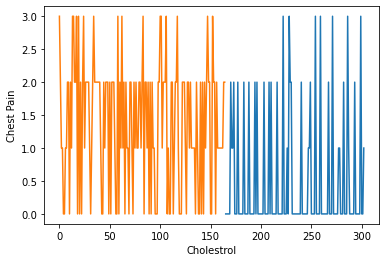

In [186]:
plt.plot(figsize=(8,5))
plt.plot(ha2["cp"], label="0" )
plt.plot(ha1["cp"], label="1")

plt.xlabel("Cholestrol")
plt.ylabel("Chest Pain")


plt.show()


In [197]:
heart_scores["age"].value_counts()

58    17
54    13
57    12
51    10
59    10
60     9
52     9
44     8
56     8
53     8
42     8
41     8
63     8
64     8
65     8
67     8
62     8
55     7
43     7
66     6
61     6
49     5
48     5
47     5
45     5
39     4
35     4
70     4
50     4
46     4
38     3
68     3
37     2
69     2
76     1
74     1
29     1
71     1
34     1
77     1
Name: age, dtype: int64

In [113]:
heart_scores["age"].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [114]:
heart_scores["chol"].value_counts()

204    6
197    6
234    6
269    5
212    5
      ..
215    1
210    1
200    1
195    1
417    1
Name: chol, Length: 152, dtype: int64

In [115]:
heart_scores["chol"].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

In [116]:
heart_scores["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [117]:
heart_scores["cp"].describe()

count    303.000000
mean       0.966997
std        1.032052
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: cp, dtype: float64

<AxesSubplot:>

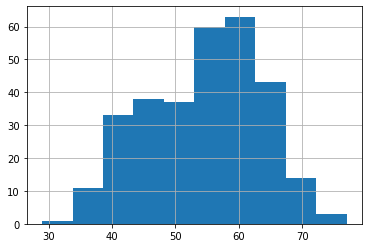

In [119]:
heart_scores["age"].hist()

In [730]:
# Now we will convert it from 'int' to 'float' type 
# using DataFrame.astype() function
heart_scores['age'] = heart_scores['age'].astype(float)
heart_scores['cp'] = heart_scores['cp'].astype(float)
heart_scores['chol'] = heart_scores['chol'].astype(float)
heart_scores['trtbps'] = heart_scores['trtbps'].astype(float)
heart_scores['fbs'] = heart_scores['fbs'].astype(float)
heart_scores['restecg'] = heart_scores['restecg'].astype(float)
heart_scores['thalachh'] = heart_scores['thalachh'].astype(float)
heart_scores['exng'] = heart_scores['exng'].astype(float)
heart_scores['slp'] = heart_scores['slp'].astype(float)
heart_scores['caa'] = heart_scores['caa'].astype(float)
heart_scores['thall'] = heart_scores['thall'].astype(float)
heart_scores['output'] = heart_scores['output'].astype(float)

print()
  
# lets find out the data type after changing
print(heart_scores.dtypes)
  
# print dataframe. 

KeyError: 'age'

In [20]:
X=heart_scores.drop('output',axis=1).copy()
Y=heart_scores['output'].copy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.30)

In [195]:
Y.unique()

array([1, 0])

In [9]:
heart_scores= heart_scores.drop('oldpeak',axis=1)


In [10]:
heart_scores= heart_scores.drop("sex",axis=1)


In [11]:
heart_scores= heart_scores.drop("fbs",axis=1)


In [12]:
heart_scores= heart_scores.drop("trtbps",axis=1)


In [13]:
heart_scores= heart_scores.drop("caa",axis=1)


In [14]:
heart_scores= heart_scores.drop("exng",axis=1)


In [15]:
heart_scores= heart_scores.drop("slp",axis=1)


In [16]:
heart_scores= heart_scores.drop("restecg",axis=1)


In [17]:
heart_scores= heart_scores.drop("thall",axis=1)


In [18]:
heart_scores= heart_scores.drop("thalachh",axis=1)


In [21]:
X_encoded= pd.get_dummies(X, columns=['cp',
                                      
                                
                                    
                                    
                                      ]).head()

X_encoded.head()

,age,chol,cp_0,cp_1,cp_2,cp_3
0,63,233,0,0,0,1
1,37,250,0,0,1,0
2,41,204,0,1,0,0
3,56,236,0,1,0,0
4,57,354,1,0,0,0


In [22]:
#spliting data into testing sets
#fit into training set data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

ht= DecisionTreeClassifier (max_leaf_nodes= 10, random_state=42)
ht.fit(X_train, Y_train)


DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)

[Text(418.5, 366.93, 'chol <= 0.5\ngini = 0.496\nsamples = 227\nvalue = [103, 124]\nclass = Yes HA'),
 Text(257.53846153846155, 285.39, 'cp_0 <= 248.5\ngini = 0.405\nsamples = 103\nvalue = [74, 29]\nclass = No HA'),
 Text(128.76923076923077, 203.85000000000002, 'cp_0 <= 221.0\ngini = 0.46\nsamples = 53\nvalue = [34, 19]\nclass = No HA'),
 Text(64.38461538461539, 122.31, 'gini = 0.397\nsamples = 33\nvalue = [24, 9]\nclass = No HA'),
 Text(193.15384615384616, 122.31, 'age <= 53.5\ngini = 0.5\nsamples = 20\nvalue = [10, 10]\nclass = No HA'),
 Text(128.76923076923077, 40.77000000000004, 'gini = 0.278\nsamples = 6\nvalue = [1, 5]\nclass = Yes HA'),
 Text(257.53846153846155, 40.77000000000004, 'gini = 0.459\nsamples = 14\nvalue = [9, 5]\nclass = No HA'),
 Text(386.3076923076923, 203.85000000000002, 'cp_0 <= 353.5\ngini = 0.32\nsamples = 50\nvalue = [40, 10]\nclass = No HA'),
 Text(321.9230769230769, 122.31, 'gini = 0.282\nsamples = 47\nvalue = [39, 8]\nclass = No HA'),
 Text(450.692307692307

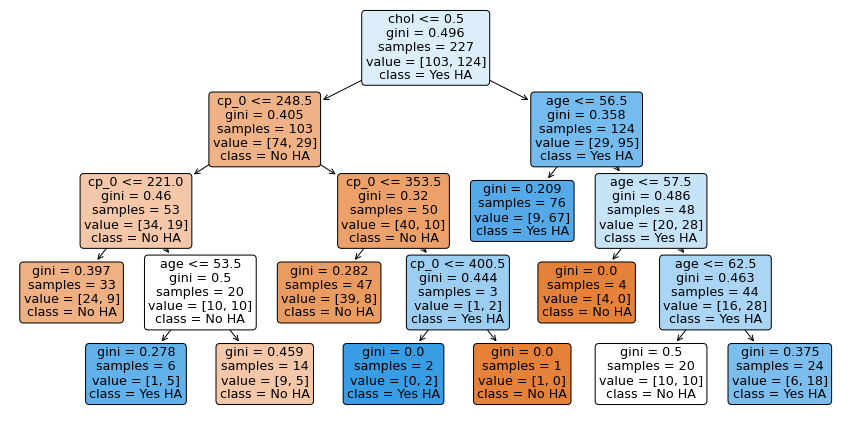

In [23]:
#Plot decision tree
plt.figure(figsize=(15, 7.5))
plot_tree(ht,
          filled=True,
          rounded= True,
          class_names=["No HA", "Yes HA"],
          feature_names= X_encoded.columns)

In [24]:
plt.show()

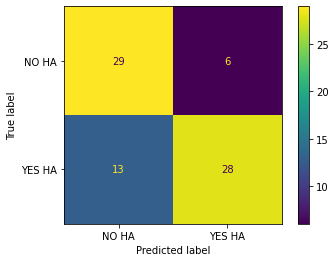

In [25]:
plot_confusion_matrix(ht, X_test,Y_test, 
                      display_labels=["NO HA","YES HA"])

In [26]:
path = ht.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas = path.ccp_alphas # extract different values for alpha
ccp_alphas = ccp_alphas[:16]

hts = [] #create an array that we will put decision trees into
for ccp_alpha in ccp_alphas:
    ht = DecisionTreeClassifier(random_state= 0 ,ccp_alpha=ccp_alpha)
    ht.fit(X_train, Y_train)
    hts.append(ht)

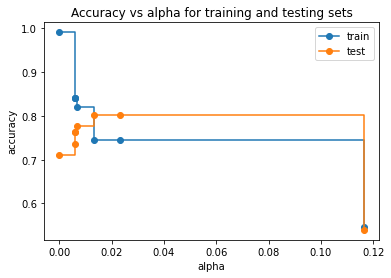

In [27]:
train_scores= [ht.score(X_train, Y_train) for ht in hts]
test_scores = [ht.score(X_test, Y_test) for ht in hts]

fig, ax= plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

<AxesSubplot:xlabel='tree'>

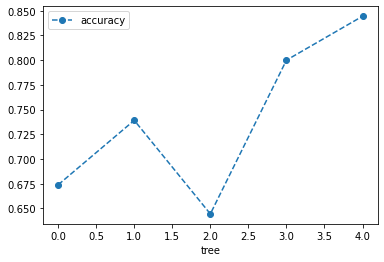

In [28]:
ht = DecisionTreeClassifier(random_state=42, ccp_alpha=0.017)
scores = cross_val_score(ht, X_train, Y_train, cv=5)
heart_scores = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})
heart_scores.plot(x='tree', y='accuracy', marker='o', linestyle= '--')


In [29]:
alpha_loop_values= []

<AxesSubplot:xlabel='alpha'>

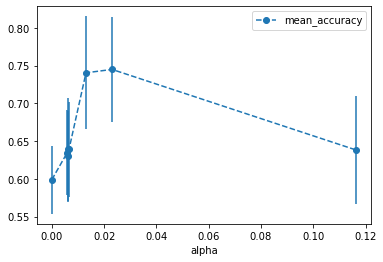

In [30]:

for ccp_alpha in ccp_alphas:
    ht = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores= cross_val_score(ht, X_train, Y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values, 
                            columns= ['alpha', 'mean_accuracy','std'])    
    
alpha_results.plot(x='alpha',
                      y='mean_accuracy',
                      yerr='std',
                      marker='o',
                      linestyle= '--')

In [32]:
alpha_results[(alpha_results['alpha']>0.020)
             & 
             (alpha_results['alpha']<0.024)]['alpha']


6    0.023056
Name: alpha, dtype: float64

In [33]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.020)
                              &
                              (alpha_results['alpha'] < 0.024)]['alpha']
ideal_ccp_alpha

6    0.023056
Name: alpha, dtype: float64

In [34]:
ideal_ccp_alpha = float(ideal_ccp_alpha)

ideal_ccp_alpha

0.02305607702644419

In [35]:
ht_pruned = DecisionTreeClassifier(random_state=42, max_leaf_nodes=7,
                                  ccp_alpha=ideal_ccp_alpha)
ht_pruned = ht_pruned.fit(X_train,Y_train)


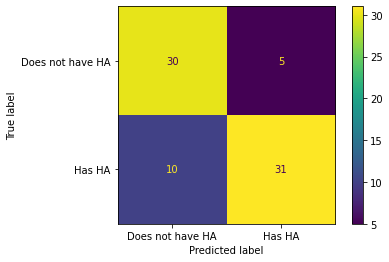

In [37]:
plot_confusion_matrix(ht_pruned ,X_test, Y_test,
                     display_labels = ["Does not have HA", "Has HA"])


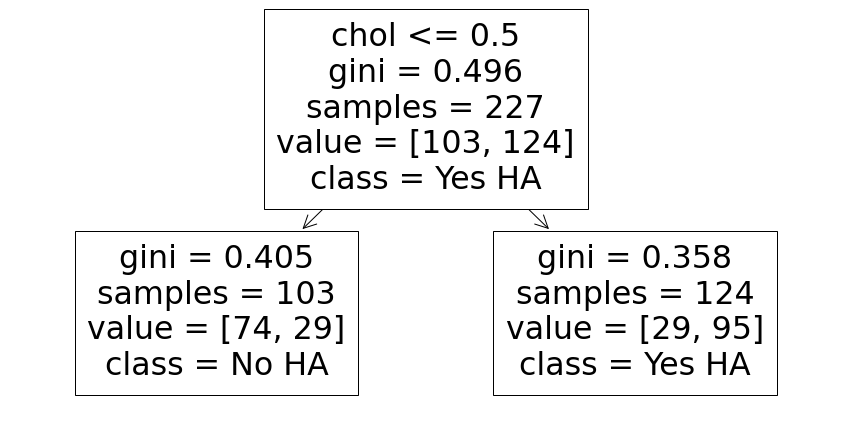

In [41]:
plt.figure(figsize= (15, 7.5))
plot_tree(ht_pruned,
         filled=True,
         rounded= True,
         class_names=["No HA","Yes HA"],
         feature_names=X_encoded.columns);